<a href="https://colab.research.google.com/github/Prasugupta21/AnExtraRep/blob/main/Heart_Disease_Prediction_Using_XgBoost%2BRandomForest_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

## **Data**

In [ ]:
df=pd.read_csv('/content/heart_2022_no_nans.csv')


In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# **Data** **Preprocessing**

Missing Values

<Axes: >

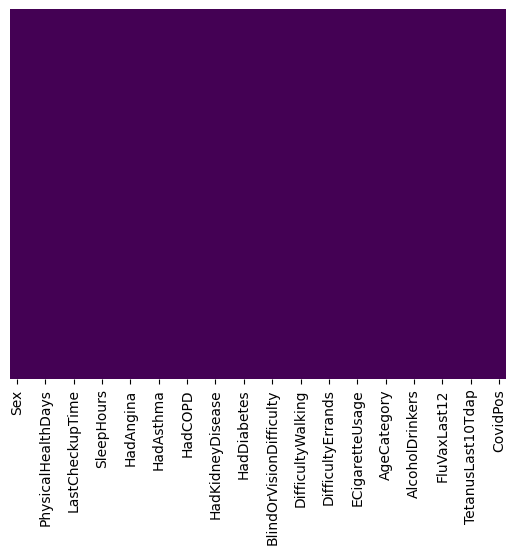

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      9481 non-null   object 
 1   Sex                        9481 non-null   object 
 2   GeneralHealth              9481 non-null   object 
 3   PhysicalHealthDays         9481 non-null   float64
 4   MentalHealthDays           9481 non-null   float64
 5   LastCheckupTime            9481 non-null   object 
 6   PhysicalActivities         9480 non-null   object 
 7   SleepHours                 9480 non-null   float64
 8   RemovedTeeth               9480 non-null   object 
 9   HadHeartAttack             9480 non-null   object 
 10  HadAngina                  9480 non-null   object 
 11  HadStroke                  9480 non-null   object 
 12  HadAsthma                  9480 non-null   object 
 13  HadSkinCancer              9480 non-null   objec

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
cols_to_drop=['State','RaceEthnicityCategory','RemovedTeeth','HeightInMeters','WeightInKilograms']
df=df.drop(columns=cols_to_drop)



In [ ]:
df.sample(5)

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ECigaretteUsage,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
714,Female,Good,1.0,0.0,No,6.0,No,No,No,Yes,...,Never used e-cigarettes in my entire life,Yes,Age 65 to 69,27.80,No,Yes,Yes,Yes,No,Yes
3323,Male,Very good,0.0,0.0,Yes,8.0,No,No,No,No,...,Never used e-cigarettes in my entire life,No,Age 50 to 54,38.02,No,Yes,No,No,No,No
2043,Male,Very good,0.0,0.0,No,9.0,No,No,No,No,...,Never used e-cigarettes in my entire life,No,Age 55 to 59,31.47,Yes,No,No,No,No,No
4183,Male,Very good,5.0,0.0,Yes,6.0,No,No,No,No,...,Never used e-cigarettes in my entire life,No,Age 55 to 59,27.32,No,No,No,No,No,Yes
1054,Female,Good,0.0,0.0,Yes,8.0,No,No,No,No,...,Never used e-cigarettes in my entire life,No,Age 50 to 54,33.28,No,No,No,No,No,Yes


In [ ]:
df['AgeCategory'].value_counts()

AgeCategory
Age 65 to 69       1158
Age 70 to 74       1083
Age 60 to 64       1042
Age 55 to 59        836
Age 75 to 79        788
Age 80 or older     780
Age 50 to 54        721
Age 45 to 49        624
Age 40 to 44        587
Age 35 to 39        564
Age 30 to 34        470
Age 18 to 24        453
Age 25 to 29        374
Name: count, dtype: int64

In [ ]:
df['GeneralHealth']

0       Very good
1       Very good
2       Very good
3            Fair
4            Good
          ...    
9476         Fair
9477         Fair
9478    Excellent
9479    Very good
9480    Excellent
Name: GeneralHealth, Length: 9481, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        9481 non-null   object 
 1   GeneralHealth              9481 non-null   object 
 2   PhysicalHealthDays         9481 non-null   float64
 3   MentalHealthDays           9481 non-null   float64
 4   LastCheckupTime            9481 non-null   object 
 5   PhysicalActivities         9480 non-null   object 
 6   SleepHours                 9480 non-null   float64
 7   HadHeartAttack             9480 non-null   object 
 8   HadAngina                  9480 non-null   object 
 9   HadStroke                  9480 non-null   object 
 10  HadAsthma                  9480 non-null   object 
 11  HadSkinCancer              9480 non-null   object 
 12  HadCOPD                    9480 non-null   object 
 13  HadDepressiveDisorder      9480 non-null   objec

In [ ]:
df['GeneralHealth'].value_counts()

GeneralHealth
Very good    3269
Good         2988
Excellent    1523
Fair         1267
Poor          434
Name: count, dtype: int64

In [ ]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(df.drop(columns=['HadHeartAttack']),df['HadHeartAttack'],test_size=0.2,)

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
transformer= ColumnTransformer(transformers=[
    # ('tnf1',SimpleImputer(),['Age']),
    # ('tnf2',LabelEncoder(), ['PhysicalActivities','HadAngina','HadStroke','HadAsthma','HadCOPD','HadSkinCancer','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyWalking','DifficultyDressingBathing','DifficultyErrands','ChestScan','AlcoholDrinkers','HIVTesting','FluVaxLast12','PneumoVaxEver','HighRiskLastYear','CovidPos']),
    ('tnf1',OrdinalEncoder(categories=[
      ['Poor','Fair','Good','Very good','Excellent'],['Age 18 to 24','Age 25 to 29','Age 30 to 34','Age 35 to 39','Age 40 to 44','Age 45 to 49','Age 50 to 54','Age 55 to 59','Age 60 to 64','Age 65 to 69','Age 70 to 74','Age 75 to 79','Age 80 or older']]),['GeneralHealth','AgeCategory']),
    ('tnf2',OneHotEncoder(sparse=False,drop='first'),[
        'Sex',
        'LastCheckupTime',
        'SmokerStatus',
        'ECigaretteUsage',
        'TetanusLast10Tdap',
        'CovidPos',
        'HadDiabetes',
        'PhysicalActivities',
        'HadAngina',
        'HadStroke',
        'HadAsthma',
        'HadCOPD',
        'HadSkinCancer',
        'HadDepressiveDisorder',
        'HadKidneyDisease',
        'HadArthritis',
        'DeafOrHardOfHearing',
        'BlindOrVisionDifficulty',
        'DifficultyConcentrating',
        'DifficultyWalking',
        'DifficultyDressingBathing',
        'DifficultyErrands',
        'ChestScan',
        'AlcoholDrinkers',
        'HIVTesting',
        'FluVaxLast12',
        'PneumoVaxEver',
        'HighRiskLastYear'])
],remainder='passthrough')

In [ ]:
transformer.fit_transform(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 2.  , 11.  ,  1.  , ...,  0.  ,  7.  , 24.53],
       [ 2.  ,  9.  ,  0.  , ...,  0.  ,  6.  , 37.79],
       [ 0.  , 12.  ,  0.  , ...,  0.  ,  9.  , 30.23],
       ...,
       [ 3.  , 10.  ,  0.  , ...,  0.  ,  7.  , 25.84],
       [ 1.  ,  0.  ,  1.  , ...,  5.  ,  6.  , 33.96],
       [ 3.  ,  6.  ,  0.  , ...,  7.  ,  7.  , 34.54]])

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [ ]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
model1= RandomForestClassifier()
model2 = xgb.XGBClassifier()

In [ ]:
pipeline_rf = Pipeline(steps=[
    ('preprocess', transformer),
    ('feature_selection', SelectFromModel(model1)),
    ('model', model1)
])

In [ ]:
pipeline_xgb = Pipeline(steps=[
    ('preprocess', transformer),
    ('feature_selection', SelectFromModel(model2)),
    ('model', model2)
])

**Using Random Forest Method**

Train the pipeline


In [ ]:
pipeline_rf.fit(x_train, y_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'good',
                                                                              'Excellent'],
                                                                             ['Age '
                                                                              '18 '
                                                                              'to '
                                                                              '24',
                                                                              'Age '
                                                                              '25 '
                                                                              'to '
                                                                              '29',
                                                                              'Age '
                                                                              '30 '
                                                                              'to '
                                                                              '34',
                                                                              'Age '
                                                                              '35 '
                                                                              'to '
                                                                              '39',
                                                                              'Age '
                                                                              '40 '
                                                                              'to '
                                                                              '44',
                                                                              'Age '
                                                                              '45 '
                                                                              'to '
                                                                              '49',
                                                                              'Age '
                                                                              '50 '
                                                                              'to '
                                                                              '54',
                                                                              'Age '
                                                                              '55 '
                                                                              'to '
                                                                              '59',
                                                                              'Age '
                                                                              '60 '
                                                                              'to '
                                                                              '64',
                                                                              'Age '
                                                                              '65 '
                                                                              'to '
                                           

**Using XgBoost Method **

In [ ]:
pipeline_xgb.fit(x_train, y_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'good',
                                                                              'Excellent'],
                                                                             ['Age '
                                                                              '18 '
                                                                              'to '
                                                                              '24',
                                                                              'Age '
                                                                              '25 '
                                                                              'to '
                                                                              '29',
                                                                              'Age '
                                                                              '30 '
                                                                              'to '
                                                                              '34',
                                                                              'Age '
                                                                              '35 '
                                                                              'to '
                                                                              '39',
                                                                              'Age '
                                                                              '40 '
                                                                              'to '
                                                                              '44',
                                                                              'Age '
                                                                              '45 '
                                                                              'to '
                                                                              '49',
                                                                              'Age '
                                                                              '50 '
                                                                              'to '
                                                                              '54',
                                                                              'Age '
                                                                              '55 '
                                                                              'to '
                                                                              '59',
                                                                              'Age '
                                                                              '60 '
                                                                              'to '
                                                                              '64',
                                                                              'Age '
                                                                              '65 '
                                                                              'to '
                                           

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

**Result from Random Forest**

Prediction


In [ ]:
predictions_rf = pipeline_rf.predict(x_test)

Accuracy

In [ ]:
true_labels=y_test_encoded

In [ ]:
accuracy_score(true_labels, predictions_rf)

0.9388273549436033

Classification Report

In [ ]:
class_report_rf=classification_report(true_labels, predictions_rf,output_dict=True)

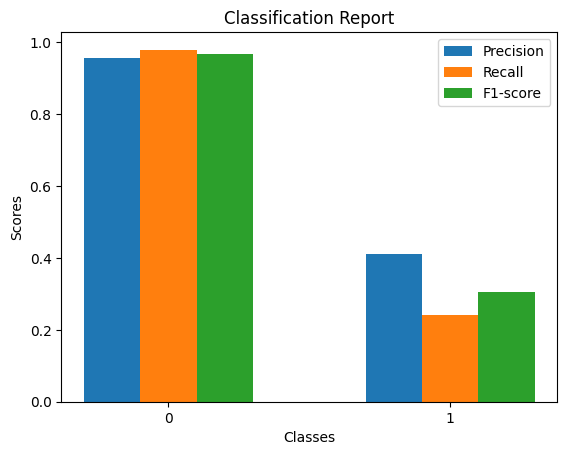

In [ ]:
classes = list(class_report_rf.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']

# Extracting precision, recall, and F1-score for each class
precision = [class_report_rf[cls]['precision'] for cls in classes]
recall = [class_report_rf[cls]['recall'] for cls in classes]
f1 = [class_report_rf[cls]['f1-score'] for cls in classes]

# Ploting precision, recall, and F1-score for each class
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

Error Rate

Error Rate:  0.061172645056396746


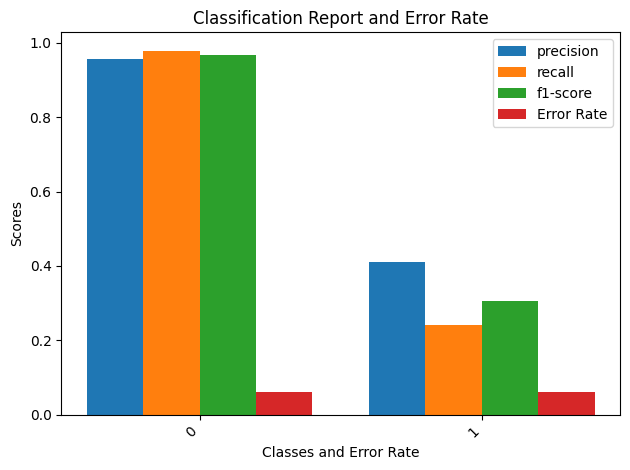

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions_rf)

# Calculating error rate
total_instances = np.sum(conf_matrix)
correctly_classified = np.trace(conf_matrix)
error_rate = 1 - (correctly_classified / total_instances)
print("Error Rate: ",error_rate)

# Extracting classes and metrics
classes = list(class_report_rf.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']
scores = [[class_report_rf[cls][metric] for cls in classes] for metric in metrics]

# Plot
x = np.arange(len(classes))
width = 0.2
fig, ax = plt.subplots()

# Ploting precision, recall, and F1-score for each class
for i, metric in enumerate(metrics):
    rects = ax.bar(x + i*width, scores[i], width, label=metric)

# Ploting error rate
ax.bar(x + len(metrics)*width, [error_rate] * len(classes), width, label='Error Rate')

ax.set_xlabel('Classes and Error Rate')
ax.set_ylabel('Scores')
ax.set_title('Classification Report and Error Rate')
ax.set_xticks(x + len(metrics)*width / 2)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

**Result from XgBoost**

Prediction

In [ ]:
predictions_xgb = pipeline_xgb.predict(x_test)

Accuracy

In [ ]:
true_labels=y_test_encoded
accuracy_score(true_labels, predictions_xgb)

0.9460827151712224

**Classification Report**

In [ ]:
class_report_xgb=classification_report(true_labels, predictions_xgb,output_dict=True)

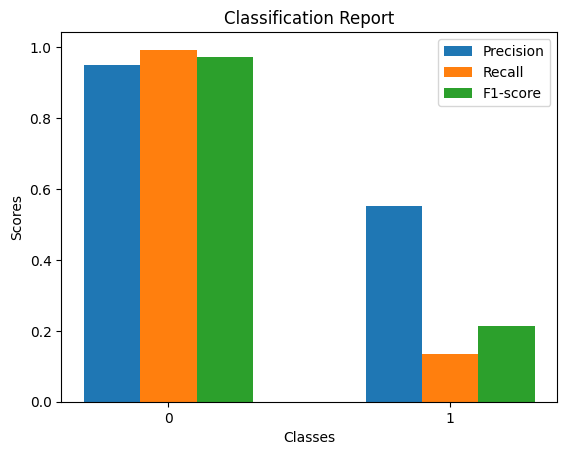

In [ ]:
classes = list(class_report_xgb.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']

# Extracting precision, recall, and F1-score for each class
precision = [class_report_xgb[cls]['precision'] for cls in classes]
recall = [class_report_xgb[cls]['recall'] for cls in classes]
f1 = [class_report_xgb[cls]['f1-score'] for cls in classes]

# Ploting precision, recall, and F1-score for each class
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

Error Rate

Error rate:  0.053917284828777556


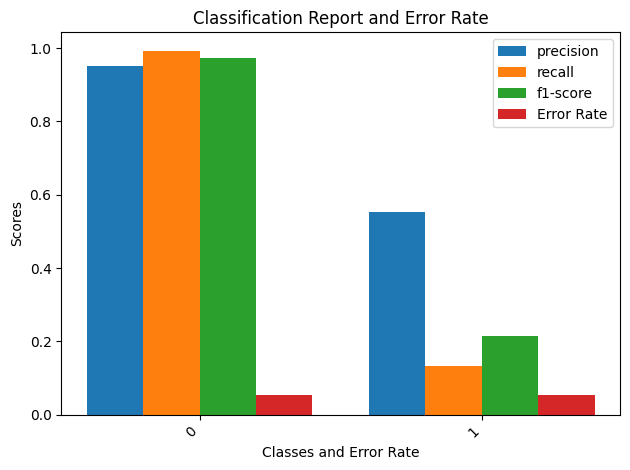

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions_xgb)

# Calculating error rate
total_instances = np.sum(conf_matrix)
correctly_classified = np.trace(conf_matrix)
error_rate = 1 - (correctly_classified / total_instances)
print("Error rate: ",error_rate)

# Extracting classes and metrics
classes = list(class_report_xgb.keys())[:-3]
metrics = ['precision', 'recall', 'f1-score']
scores = [[class_report_xgb[cls][metric] for cls in classes] for metric in metrics]

# Plot
x = np.arange(len(classes))
width = 0.2
fig, ax = plt.subplots()

# Ploting precision, recall, and F1-score for each class
for i, metric in enumerate(metrics):
    rects = ax.bar(x + i*width, scores[i], width, label=metric)

# Ploting error rate
ax.bar(x + len(metrics)*width, [error_rate] * len(classes), width, label='Error Rate')

ax.set_xlabel('Classes and Error Rate')
ax.set_ylabel('Scores')
ax.set_title('Classification Report and Error Rate')
ax.set_xticks(x + len(metrics)*width / 2)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()